In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file='/content/drive/MyDrive/Colab Notebooks/data_01/data_2d.csv'
df = pd.read_csv(file)

In [56]:
df

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


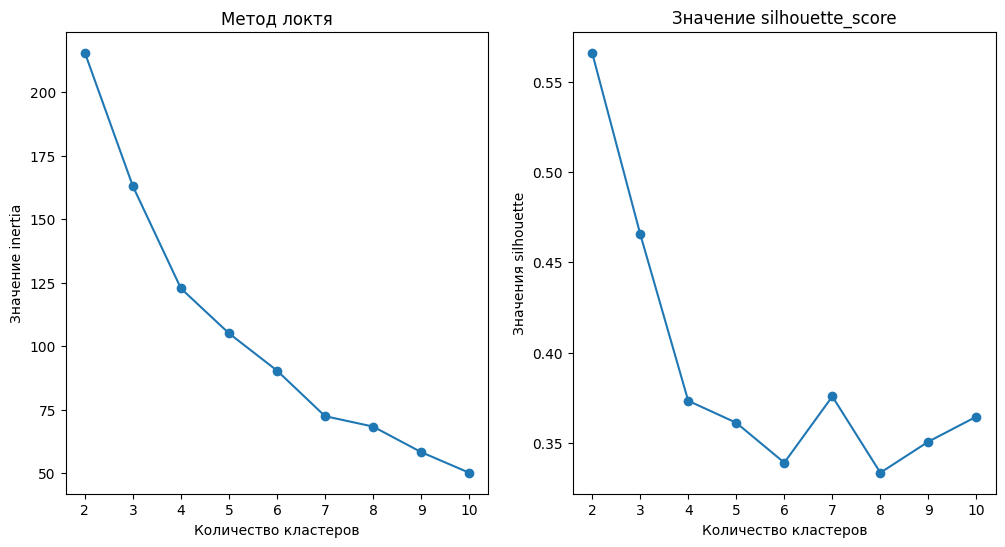

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

inertia = []
silhouette = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Значение inertia')
plt.title('Метод локтя')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Значения silhouette')
plt.title('Значение silhouette_score')

plt.show()


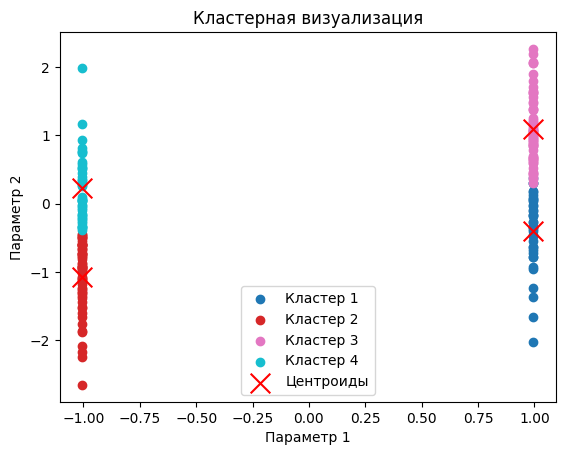

In [104]:
optimal_n_clusters = 4

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


kmeans = KMeans(n_clusters=optimal_n_clusters, n_init="auto", random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

unique_labels = np.unique(clusters)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    cluster_data = scaled_data[clusters == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[color], label=f'Кластер {label+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Центроиды')

plt.xlabel('Параметр 1')
plt.ylabel('Параметр 2')
plt.title('Кластерная визуализация')
plt.legend()
plt.show()


In [105]:
centroids = kmeans.cluster_centers_

distances = []
for i in range(len(centroids)):
    for j in range(i+1, len(centroids)):
        dist = np.linalg.norm(centroids[i] - centroids[j])
        distances.append((i+1, j+1, dist))

print("\tРасстояния между центроидами:\n")
for dist in distances:
    print(f"Расстояние между центроидами {dist[0]} и {dist[1]}: {dist[2]}")


	Расстояния между центроидами:

Расстояние между центроидами 1 и 2: 2.5836585075382663
Расстояние между центроидами 1 и 3: 1.5016251936508815
Расстояние между центроидами 1 и 4: 2.5389386102605314
Расстояние между центроидами 2 и 3: 3.395021625611507
Расстояние между центроидами 2 и 4: 1.2953727551911463
Расстояние между центроидами 3 и 4: 2.7244272935388008


In [106]:
file_1='/content/drive/MyDrive/Colab Notebooks/data_01/mnist.csv'
df_1 = pd.read_csv(file_1)

In [67]:
df_1

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125,0.126,0.127,0.128,0.129,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.150,0.151,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.160,0.161,0.162,0.163,0.164,0.165,0.166,0.167,0.168,0.169,0.170,0.171,0.172,0.173,0.174,0.175,0.176,0.177,0.178,0.179,0.180,0.181,0.182,0.183,0.184,0.185,0.186,0.187,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.200,0.201,84,185,159,151,60,36,0.202,0.203,0.204,0.205,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.220,0.221,0.222,0.223,222,254,254.1,254.2,254.3,241,198,198.1,198.2,198.3,198.4,198.5,198.6,198.7,170,52,0.224,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232,0.233,0.234,0.235,67,114,72,114.1,163,227,254.4,225,254.5,254.6,254.7,250,229,254.8,254.9,140,0.236,0.237,0.238,0.239,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,0.250,0.251,0.252,17,66,14,67.1,67.2,67.3,59,21,236,254.10,106,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.260,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,0.274,0.275,0.276,83,253,209,18,0.277,0.278,0.279,0.280,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.290,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,0.299,22,233,255,83.1,0.300,0.301,0.302,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.310,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,0.322,0.323,129,254.11,238,44,0.324,0.325,0.326,0.327,0.328,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,0.338,0.339,0.340,0.341,0.342,0.343,0.344,0.345,0.346,59.1,249,254.12,62,0.347,0.348,0.349,0.350,0.351,0.352,0.353,0.354,0.355,0.356,0.357,0.358,0.359,0.360,0.361,0.362,0.363,0.364,0.365,0.366,0.367,0.368,0.369,0.370,133,254.13,187,5,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,9,205,248,58,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415,0.416,0.417,126,254.14,182,0.418,0.419,0.420,0.421,0.422,0.423,0.424,0.425,0.426,0.427,0.428,0.429,0.430,0.431,0.432,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.440,0.441,75,251,240,57,0.442,0.443,0.444,0.445,0.446,0.447,0.448,0.449,0.450,0.451,0.452,0.453,0.454,0.455,0.456,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,19,221,254.15,166,0.465,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.480,0.481,0.482,0.483,0.484,0.485,0.486,0.487,3,203,254.16,219,35,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,38,254.17,254.18,77,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533,31,224,254.19,115,1,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,133.1,254.20,254.21,52.1,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,61,242,254.22,254.23,52.2,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,121,254.24,

In [107]:
pd.options.display.max_columns = None
print(df_1.iloc[:1, :])

   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  0.11  0.12  0.13  \
0  2  0    0    0    0    0    0    0    0    0    0     0     0     0     0   

   0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  0.23  0.24  0.25  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  0.35  0.36  0.37  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48  0.49  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.60  0.61  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.70  0.71  0.72  0.73  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   0.74  0.75  0.76  0.77  0.78  0.79  0.80  0.81  0.82  0.83  0

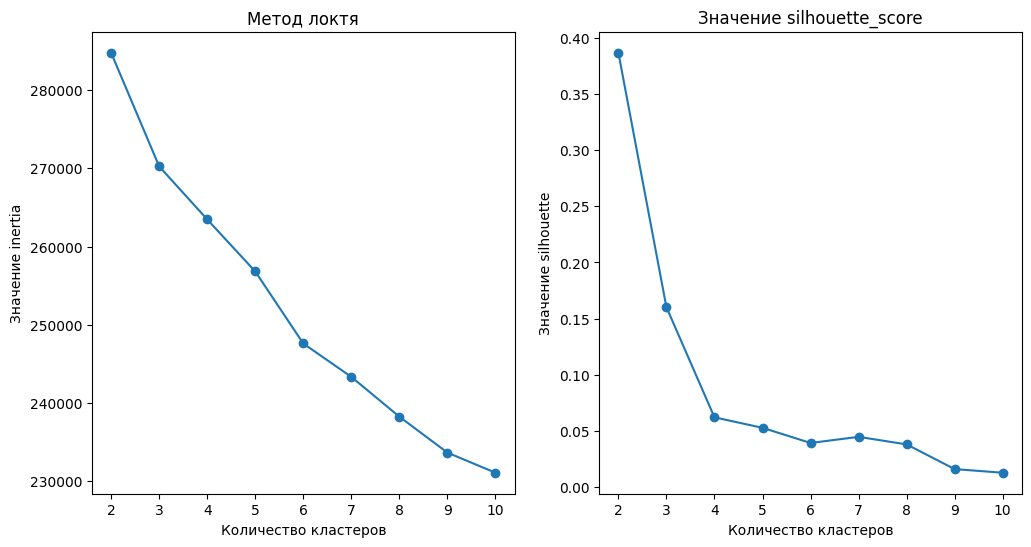

In [108]:
X = df_1.drop(columns=df_1.columns[0])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


inertia = []
silhouette = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    kmeans.fit(scaled_X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_X, kmeans.labels_))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Значение inertia')
plt.title('Метод локтя')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Значение silhouette')
plt.title('Значение silhouette_score')

plt.show()


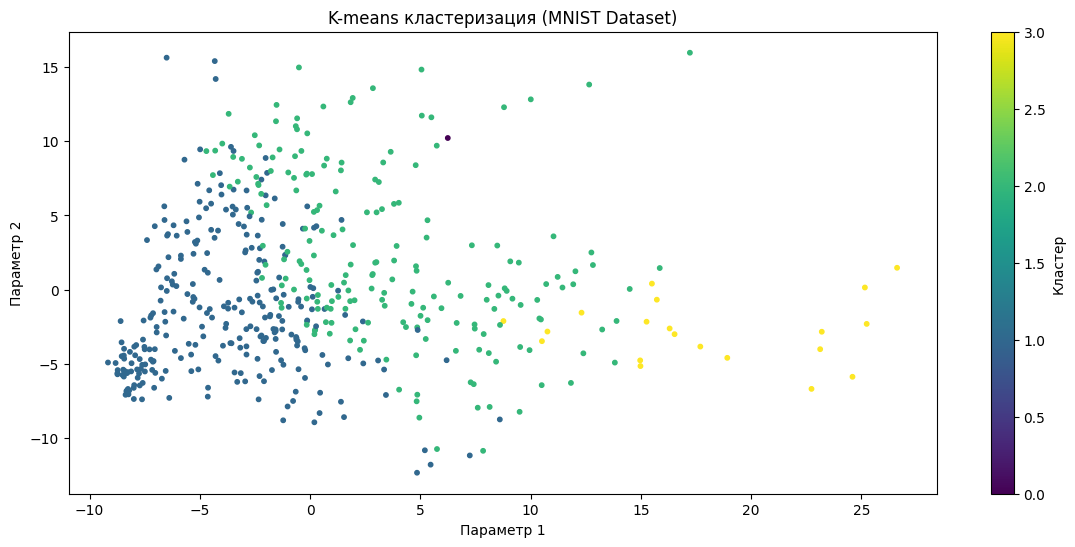

In [109]:
from sklearn.decomposition import PCA

X = df_1.drop(columns=df_1.columns[0])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, n_init="auto", random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

plt.figure(figsize=(14, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('K-means кластеризация (MNIST Dataset)')
plt.xlabel('Параметр 1')
plt.ylabel('Параметр 2')
plt.colorbar(label='Кластер')
plt.show()

In [110]:
centroids = kmeans.cluster_centers_
distances = []
for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):
        distance = np.linalg.norm(centroids[i] - centroids[j])
        distances.append((i, j, distance))

print("\tРасстояния между центроидами:\n")
for i, j, distance in distances:
    print(f"Расстояние между центроидами {i+1} и {j+1}: {distance}")


	Расстояния между центроидами:

Расстояние между центроидами 1 и 2: 47.51755338137891
Расстояние между центроидами 1 и 3: 46.16462946624556
Расстояние между центроидами 1 и 4: 49.801888962924096
Расстояние между центроидами 2 и 3: 9.429791547723262
Расстояние между центроидами 2 и 4: 25.534354050004225
Расстояние между центроидами 3 и 4: 22.572676768351762
